## Machine Learning Algorithms applied to Divorce Data

In [11]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [19]:
# read data from csv file into pandas data frame
df = pd.read_csv("tree_feature_data.csv")
df

,Atr17,Atr36,Atr37,Atr38,Atr40,Atr41,Class
0,0,1,2,1,3,2,1
1,4,2,3,4,4,2,1
2,3,1,2,1,3,3,1
3,3,1,3,3,4,2,1
4,1,0,0,0,1,0,1
5,2,1,1,2,2,2,1
6,3,2,3,2,3,3,1
7,2,1,4,4,4,4,1
8,3,1,1,2,2,2,1
9,1,0,1,1,2,1,1


## SGD Classifier

In [20]:
data = df.values
X = data[:, 0:6]
y = data[:, 6]

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)  
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)  

In [23]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=70)
clf.fit(X, y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=70,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [24]:
target = df["Class"]
target_names = ["Married", "Divorced"]

In [25]:
from sklearn.metrics import classification_report
predictions = clf.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

     Married       0.66      1.00      0.79        25
    Divorced       1.00      0.41      0.58        22

    accuracy                           0.72        47
   macro avg       0.83      0.70      0.69        47
weighted avg       0.82      0.72      0.69        47



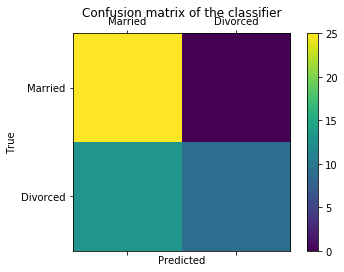

In [27]:
import itertools
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix

y_pred = clf.predict(X_test)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
cm = confusion_matrix(y_test, y_pred, labels=[0,1])
# print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + target_names)
ax.set_yticklabels([''] + target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()